# Utforsking av tidsrekke-data

Kilde til data:
http://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

Leser inn og forandrer litt på data:

In [11]:
df = pd.read_csv("Data/monthly_in_situ_co2_mlo.csv", 
                 na_values=-99.99, 
                 skiprows=55, 
                 skipfooter=6)
df.drop([0, 1], axis=0, inplace=True)
df.reset_index(inplace=True)
df.drop(['Date Excel', 'index'], axis=1, inplace=True)
df.head(15)

/Users/Eirik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Yr,Mn,Date,CO2[ppm],seasonally adjusted[ppm],fit[ppm],seasonally adjusted fit[ppm],CO2 filled[ppm],seasonally adjusted filled[ppm]
0,1958,3,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
1,1958,4,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
2,1958,5,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
3,1958,6,1958.4548,NaN,NaN,317.24,315.14,317.24,315.14
4,1958,7,1958.5370,315.86,315.18,315.87,315.22,315.86,315.18
5,1958,8,1958.6219,314.93,316.18,314.00,315.29,314.93,316.18
6,1958,9,1958.7068,313.20,316.08,312.45,315.35,313.20,316.08
7,1958,10,1958.7890,NaN,NaN,312.43,315.41,312.43,315.41
8,1958,11,1958.8740,313.33,315.20,313.62,315.46,313.33,315.20
9,1958,12,1958.9562,314.67,315.43,314.76,315.51,314.67,315.43


In [12]:
df["Dato"] = df["Yr"].map(str) + "-" +df["Mn"].map(str) # Lager ny dato kolonne med format YYYY-MM
df.Dato = pd.to_datetime(df['Dato'], format='%Y-%m') # Bytter dato til pandas-datetime format
df.set_index(['Dato'],inplace=True) #Setter dato som index
df = df.rename({"CO2[ppm]": 'CO2'}, axis=1)  # Lager nytt navn for C02-konsentrasjon kolonne

In [15]:
df = df[["CO2"]] # Trenger bare disse verdiene
df.fillna(method='ffill', inplace=True) # Forward filling the NaN values

In [16]:
df.head(15)

,CO2
Dato,
1958-03-01,315.70
1958-04-01,317.45
1958-05-01,317.51
1958-06-01,317.51
1958-07-01,315.86
1958-08-01,314.93
1958-09-01,313.20
1958-10-01,313.20
1958-11-01,313.33


#### Enkel plot av data:

In [17]:
def plot_df(df, x, y, title="", xlabel='Dato', ylabel='CO2[ppm]'):
    
    plt.figure(figsize=(16,8))
    plt.plot(x, y,linestyle="-")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

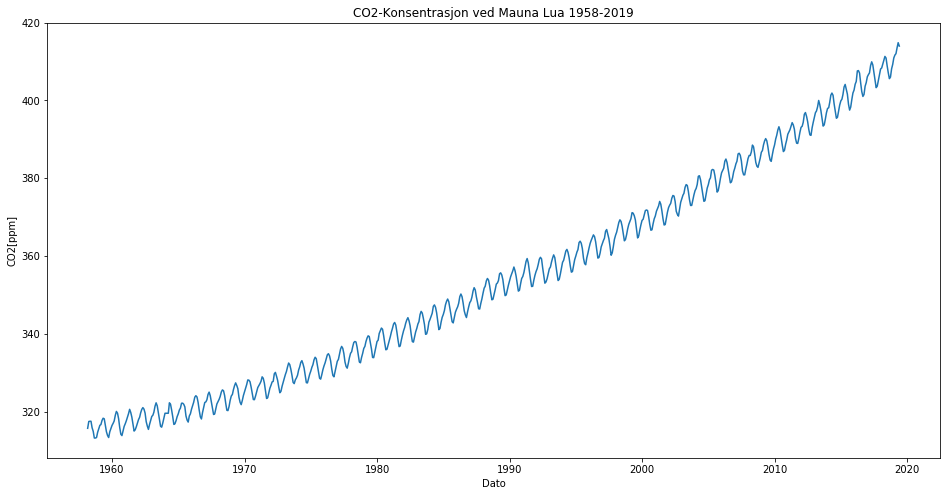

In [18]:
plot_df(df, x=df.index, y=df.CO2, title='CO2-Konsentrasjon ved Mauna Lua 1958-2019') 

#### Plot av hvert år:

In [19]:
df.reset_index(inplace=True)
df['year'] = [d.year for d in df.Dato]
df['month'] = [d.strftime('%b') for d in df.Dato]
years = df['year'].unique()

In [20]:
np.random.seed(42)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

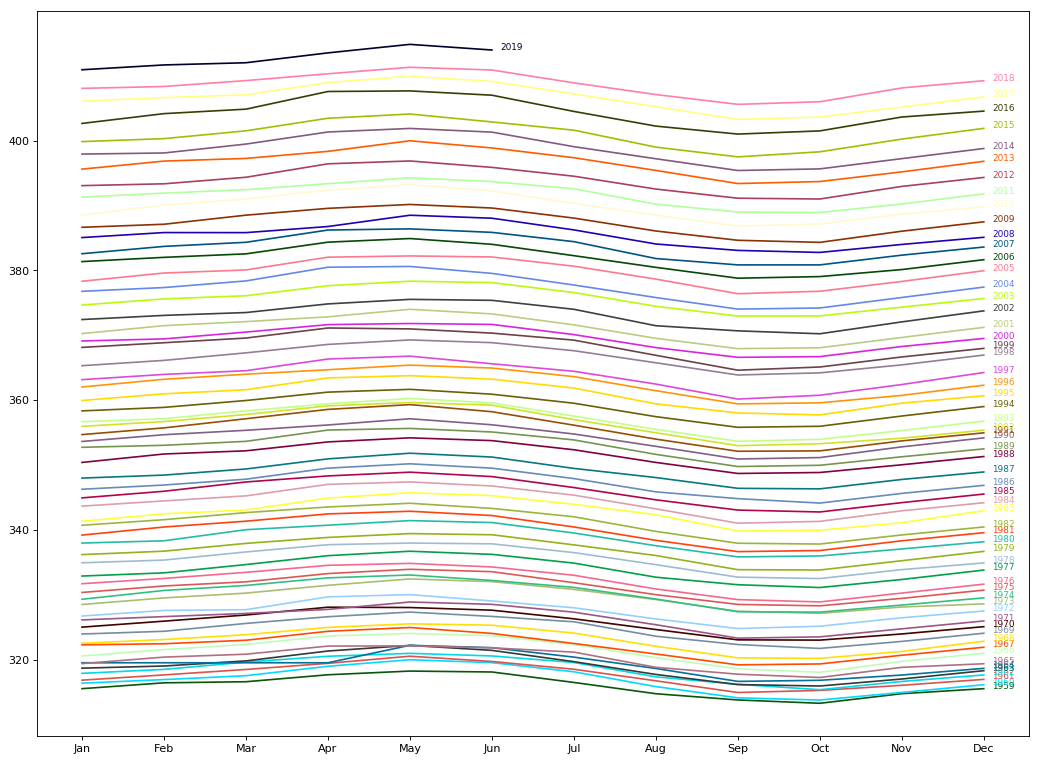

In [21]:
plt.figure(figsize=(16,12), dpi=80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'CO2', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'CO2'][-1:].values[0], y, fontsize=8, color=mycolors[i])

## Observasjoner

#### Trend

Det er lett å se at CO2-konsentrasjonen øker for hvert år og at det blir større økning for hvert år

#### Season

CO2-konsentrasjonen er høyest om våren og lavest om høsten. Som regel høyest rundt Mai og lavest rundt Oktober. 

### Decomposition

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

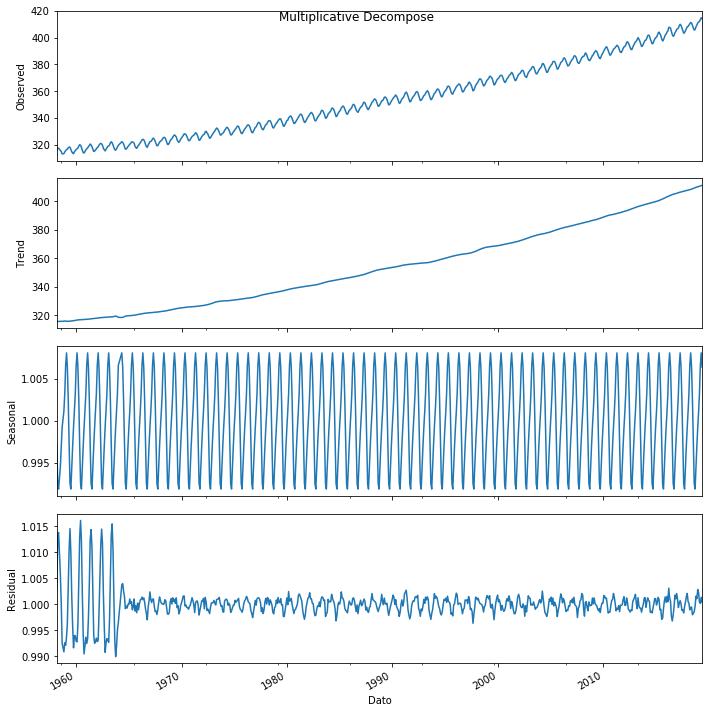

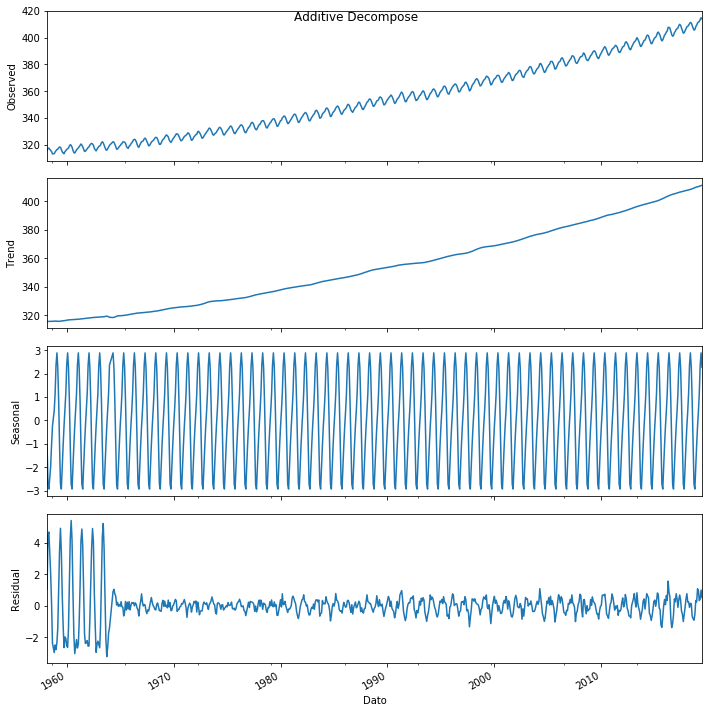

In [88]:
result_mul = seasonal_decompose(df['CO2'], model='multiplicative', extrapolate_trend='freq', freq=12)
result_add = seasonal_decompose(df['CO2'], model='additive', extrapolate_trend='freq', freq=12)
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_add.plot().suptitle('Additive Decompose', fontsize=12)
plt.show()

### Estimering av trend komponent

In [223]:
n = len(df.index) #antall data-punkter
q = 6
x = np.pad(df.CO2.values, q, 'edge')

In [224]:
m = np.zeros(n)

for i in range(n):
    
    for j in range(-q,q+1):
        
        if (j == -q or j == q):
            k = 0.5
        else:
            k = 1

        m[i] += k*x[q+i-j]
    
    m[i] = m[i]/(2*q)

In [225]:
df1 = df.copy(deep=True)
df1.CO2 = m

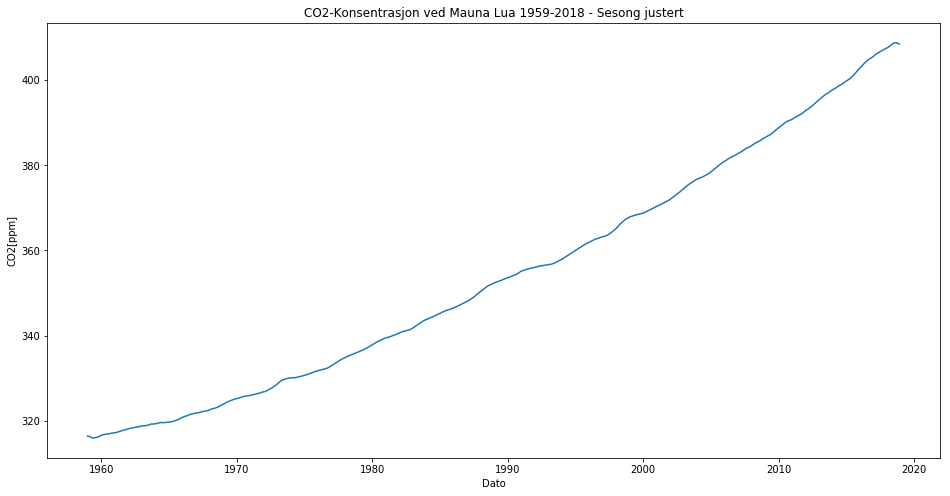

In [226]:
plot_df(df1, x=df1.index, y=df1.CO2, title='CO2-Konsentrasjon ved Mauna Lua 1959-2018 - Sesong justert') 

In [245]:
df2 = df1.reset_index(drop=True)
df2.head()

,CO2
0,316.402500
1,316.410000
2,316.305000
3,316.138750
4,316.012917


In [297]:
y = df2.CO2.values
X = df2.index.values

In [309]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = X.reshape(-1,1)

poly = PolynomialFeatures(4)
X2 = poly.fit_transform(X)

reg = LinearRegression().fit(X2, y)
reg.score(X2,y)

0.9997051663102288

In [310]:
print(X2.shape)

(720, 5)


In [311]:
pred1 = (np.dot(X2, reg.coef_))

In [312]:
reg.intercept_

316.19630569555966

In [313]:
pred1.shape

(720,)

In [314]:
pred = reg.intercept_ + pred1

In [315]:
diff = (pred - y)

In [316]:
np.mean(diff)

1.2631870857957336e-14

In [317]:
dfz = df1.copy(deep=True)
dfz.CO2 = diff

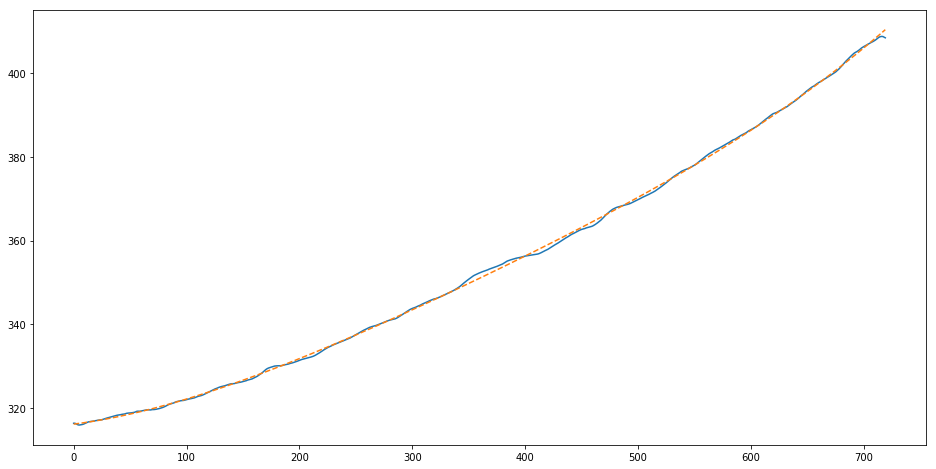

In [318]:
plt.figure(figsize=(16,8))
plt.plot(X, y,linestyle="-")
plt.plot(X, pred,linestyle="--")
plt.show()

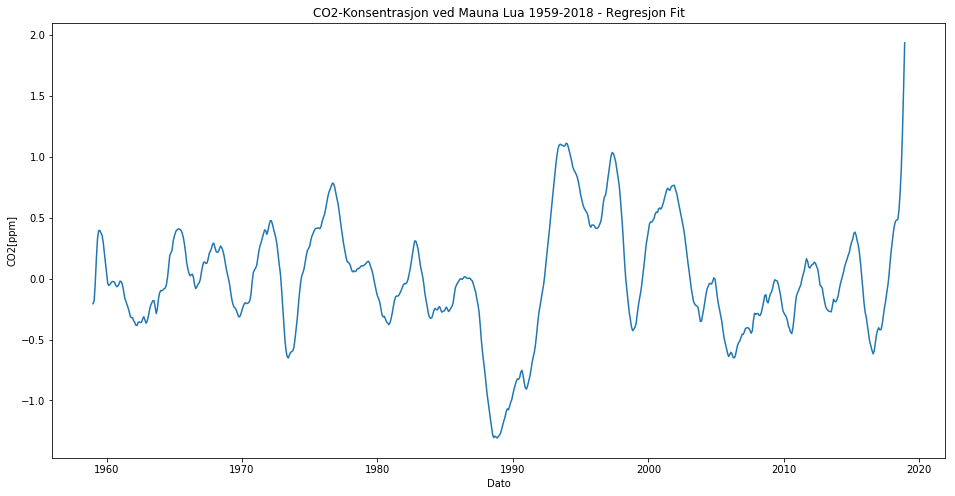

In [319]:
plot_df(dfz, x=dfz.index, y=dfz.CO2, title='CO2-Konsentrasjon ved Mauna Lua 1959-2018 - Regresjon Fit') 

### Estimering av sesong-komponent

In [293]:
aar = int(df.shape[0]/12)

w = np.zeros(12)
for i in range(12):
    for j in range(aar):
        w[i] += (x[i + (j*12)] - m[i + (j*12)])
    w[i] = (w[i]/60)

In [294]:
s = np.zeros(12)
for i in range(12):
    s[i] = w[i] - ((1/12.0)*(np.sum(w)))

In [295]:
st = np.tile(s,60)

In [296]:
df2 = df.copy(deep=True)
df2.CO2 = st

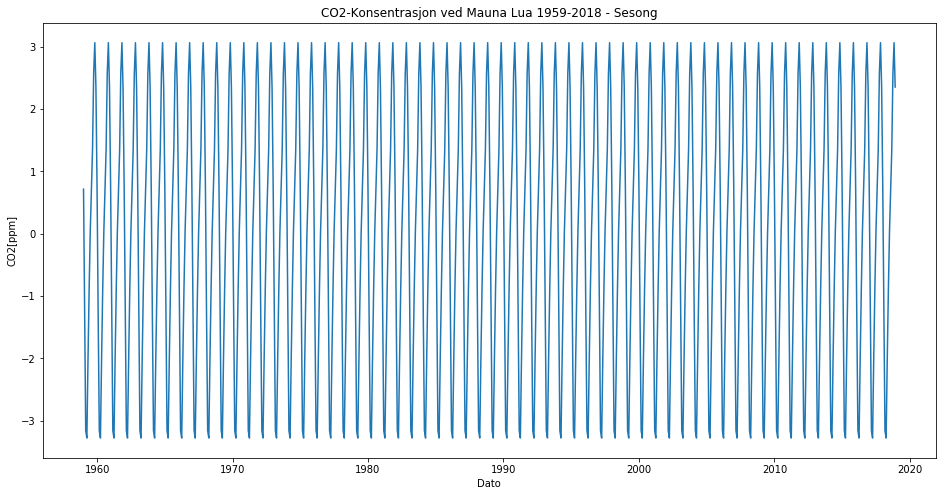

In [297]:
plot_df(df2, x=df2.index, y=df2.CO2, title='CO2-Konsentrasjon ved Mauna Lua 1959-2018 - Sesong') 

In [301]:
d = x[6:-6] - st

In [302]:
n = len(d) #antall data-punkter
q = 6
dx = np.pad(d, q, 'edge')

In [304]:
mh = np.zeros(n)

for i in range(n):
    
    for j in range(-q,q+1):
        
        if (j == -q or j == q):
            k = 0.5
        else:
            k = 1

        mh[i] += k*dx[q+i-j]
    
    mh[i] = mh[i]/(2*q)

In [306]:
y = d - mh

In [309]:
df3 = df.copy(deep=True)
df3.CO2 = y

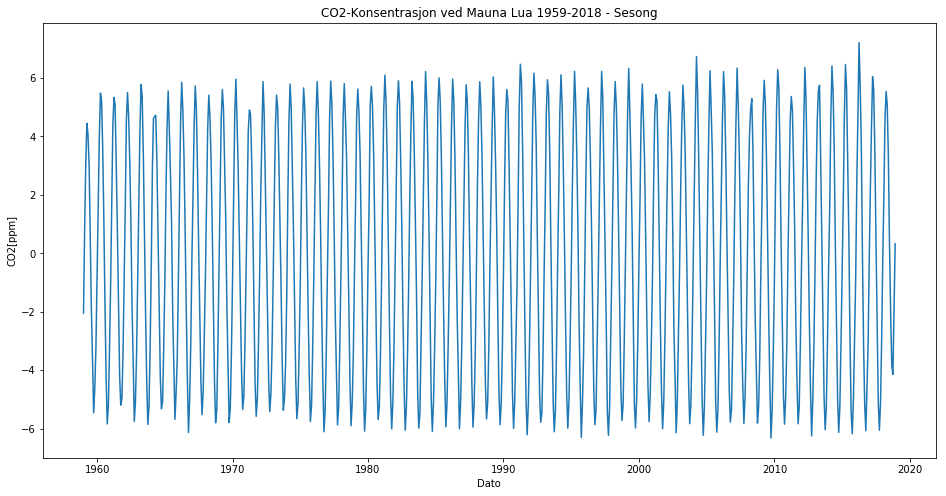

In [310]:
plot_df(df3, x=df3.index, y=df3.CO2, title='CO2-Konsentrasjon ved Mauna Lua 1959-2018 - Sesong') 

In [16]:
df.head(15)

,CO2
Dato,
1959-01-01,315.58
1959-02-01,316.48
1959-03-01,316.65
1959-04-01,317.72
1959-05-01,318.29
1959-06-01,318.15
1959-07-01,316.54
1959-08-01,314.80
1959-09-01,313.84
